###Problem Statement

In this assignment students need to predict whether a person makes over 50K per year
or not from classic adult dataset using XGBoost. The description of the dataset is as
follows:

Data Set Information:
Extraction was done by Barry Becker from the 1994 Census database. A set of
reasonably clean records was extracted using the following conditions: ((AAGE>16) &&
(AGI>100) && (AFNLWGT>1)&& (HRSWK>0))

Attribute Information:
Listing of attributes:
>50K, <=50K.
age: continuous.
workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov,
Without-pay, Never-worked.
fnlwgt: continuous.
education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc,
9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.

education-num: continuous.
marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed,
Married-spouse-absent, Married-AF-spouse.
occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial,
Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing,
Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
sex: Female, Male.
capital-gain: continuous.
capital-loss: continuous.
hours-per-week: continuous.
native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany,
Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras,
Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France,
Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala,
Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong,
Holand-Netherlands.
Following is the code to load required libraries and data:
import numpy as np
import pandas as pd
train_set =
pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.dat
a', header = None)

test_set =
pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.test'
, skiprows = 1, header = None)
col_labels = ['age', 'workclass', 'fnlwgt', 'education', 'education_num', 'marital_status',
'occupation','relationship', 'race', 'sex', capital_gain', 'capital_loss', 'hours_per_week',
'native_country', 'wage_class']
train_set.columns = col_labels
test_set.columns = col_labels

In [59]:
import pandas as pd
import numpy as np

from sklearn.metrics import accuracy_score
import xgboost as xgb

from matplotlib import pyplot as pt
import seaborn as sns

sns.set(color_codes=True)
% matplotlib inline

#####  Loading data

In [60]:
train_set = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data', header = None)
test_set = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.test' , skiprows = 1, header = None)

#####  Add columns labels

In [61]:
col_labels = ['age', 'workclass', 'fnlwgt', 'education', 'education_num', 'marital_status', 'occupation','relationship', 'race', 'sex', 'capital_gain', 'capital_loss', 'hours_per_week', 'native_country', 'wage_class']

In [62]:
train_set.columns = col_labels 
test_set.columns = col_labels

#####  Train data header

In [63]:
train_set.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


##### Test data header

In [64]:
test_set.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K.
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K.


### Data Cleaning


##### Step1 : Removing rows contains '?'

In [65]:
train_set=train_set.replace(regex='\?',value=pd.np.nan).dropna(how='any')
train_set.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


### Transformation of data

##### column : hours_per_week

count    30162.000000
mean        40.931238
std         11.979984
min          1.000000
25%         40.000000
50%         40.000000
75%         45.000000
max         99.000000
Name: hours_per_week, dtype: float64

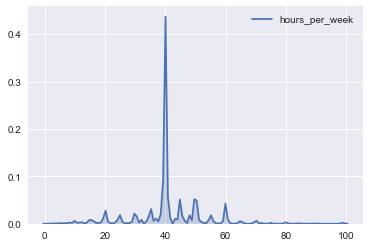

In [66]:
sns.kdeplot(train_set.hours_per_week,shade=True)
train_set.hours_per_week.describe()

As per above summary and plot we understood that most of the people working 40 to 45 hours
therefore, we will group hours_per_week into 5 relavent groups as below
###### group 1: less_than_40
###### group 2: between_40_to_45
###### group 3 :between_45_to_60
###### group 4 :between_60_to_80
###### group 5 :more_than_80

In [67]:
train_set.hours_per_week=train_set.hours_per_week.astype(int)
train_set.loc[train_set.hours_per_week < 40,'hours_per_week_group'] = 'less_than_40'
train_set.loc[(train_set.hours_per_week >= 40) & (train_set.hours_per_week <= 45),'hours_per_week_group'] = 'between_40_to_45'
train_set.loc[(train_set.hours_per_week > 45) & (train_set.hours_per_week <= 60),'hours_per_week_group'] = 'between_45_to_60'
train_set.loc[(train_set.hours_per_week > 60) & (train_set.hours_per_week <= 80),'hours_per_week_group'] = 'between_60_to_80'
train_set.loc[train_set.hours_per_week > 80,'hours_per_week_group'] = 'more_than_40'

In [68]:
train_set['hours_per_week_group'].head()

0    between_40_to_45
1        less_than_40
2    between_40_to_45
3    between_40_to_45
4    between_40_to_45
Name: hours_per_week_group, dtype: object

##### column:native_country

In [69]:
train_set.native_country.unique()


array([' United-States', ' Cuba', ' Jamaica', ' India', ' Mexico',
       ' Puerto-Rico', ' Honduras', ' England', ' Canada', ' Germany',
       ' Iran', ' Philippines', ' Poland', ' Columbia', ' Cambodia',
       ' Thailand', ' Ecuador', ' Laos', ' Taiwan', ' Haiti', ' Portugal',
       ' Dominican-Republic', ' El-Salvador', ' France', ' Guatemala',
       ' Italy', ' China', ' South', ' Japan', ' Yugoslavia', ' Peru',
       ' Outlying-US(Guam-USVI-etc)', ' Scotland', ' Trinadad&Tobago',
       ' Greece', ' Nicaragua', ' Vietnam', ' Hong', ' Ireland',
       ' Hungary', ' Holand-Netherlands'], dtype=object)

In [70]:
len(train_set.native_country.unique())

41

categorical variable named native_county has 41 unique values, if we use directly this column for training it might lead to overfitting, therefore thransforming native_county into native_region

In [71]:
Asia_East = np.array([" Cambodia", " China", " Hong", " Laos", " Thailand"," Japan", " Taiwan", " Vietnam"," Philippines"])
Asia_Central = np.array([" India", " Iran"])
Central_America =  np.array([" Cuba", " Guatemala", " Jamaica", " Nicaragua"," Puerto-Rico",  " Dominican-Republic", " El-Salvador"," Haiti", " Honduras", " Mexico", " Trinadad&Tobago"])
South_America = np.array([" Ecuador", " Peru", " Columbia"," South"])
Europe_West = np.array([" England", " Germany", " Holand-Netherlands", " Ireland"," France", " Greece", " Italy", " Portugal", " Scotland"])
Europe_East = np.array([" Poland", " Yugoslavia", " Hungary"])
North_America = np.array([" Outlying-US(Guam-USVI-etc)", " United-States"," Canada"])

In [72]:
train_set.loc[train_set.native_country.isin(Asia_East),'native_region'] = 'Asia_East'
train_set.loc[train_set.native_country.isin(Asia_Central),'native_region'] = 'Asia_Central'
train_set.loc[train_set.native_country.isin(Central_America),'native_region'] = 'Central_America'
train_set.loc[train_set.native_country.isin(South_America),'native_region'] = 'South_America'
train_set.loc[train_set.native_country.isin(Europe_West),'native_region'] = 'Europe_West'
train_set.loc[train_set.native_country.isin(Europe_East),'native_region'] = 'Europe_East'
train_set.loc[train_set.native_country.isin(North_America),'native_region'] = 'North_America'

In [73]:
train_set.native_region.unique()


array(['North_America', 'Central_America', 'Asia_Central', 'Europe_West',
       'Asia_East', 'Europe_East', 'South_America'], dtype=object)

##### column : capital_gain & capital_loss

count    30162.000000
mean      1092.007858
std       7406.346497
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max      99999.000000
Name: capital_gain, dtype: float64

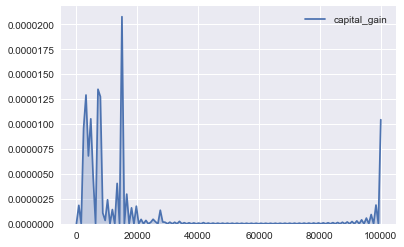

In [74]:
sns.kdeplot(train_set.capital_gain,shade=True)
train_set.capital_gain.describe()

count    30162.000000
mean        88.372489
std        404.298370
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max       4356.000000
Name: capital_loss, dtype: float64

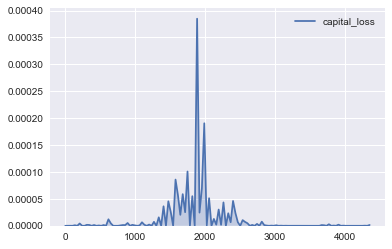

In [75]:
sns.kdeplot(train_set.capital_loss,shade=True)
train_set.capital_loss.describe()

As per above summary and plots, we understood that most of the values of capital_gain & capital_loss are zeros, therefore we are replacing 0 with mean of columns to avoid overfitting

In [76]:
capital_gain_mean = train_set.capital_gain.mean()
capital_loss_mean = train_set.capital_loss.mean()


In [77]:
train_set.loc[train_set.capital_gain == 0 ,'capital_gain'] = capital_gain_mean
train_set.loc[train_set.capital_loss == 0 ,'capital_loss'] = capital_loss_mean

In [78]:
train_set.capital_gain.describe()

count    30162.000000
mean      2092.128044
std       7263.712520
min        114.000000
25%       1092.007858
50%       1092.007858
75%       1092.007858
max      99999.000000
Name: capital_gain, dtype: float64

In [79]:
train_set.capital_loss.describe()


count    30162.000000
mean       172.563970
std        385.912263
min         88.372489
25%         88.372489
50%         88.372489
75%         88.372489
max       4356.000000
Name: capital_loss, dtype: float64

##### column : work class : No Change required

In [80]:
train_set.workclass.describe()

count        30162
unique           7
top        Private
freq         22286
Name: workclass, dtype: object

In [81]:
train_set.workclass.unique()

array([' State-gov', ' Self-emp-not-inc', ' Private', ' Federal-gov',
       ' Local-gov', ' Self-emp-inc', ' Without-pay'], dtype=object)

##### Convert categorical variables into numerical format
eduction and education_num are duplicate values

In [82]:
workclass = pd.factorize(train_set.workclass)
education = pd.factorize(train_set.education)
hours_per_week_group = pd.factorize(train_set.hours_per_week_group) ## Tacking grouping 
marital_status = pd.factorize(train_set.marital_status)
occupation = pd.factorize(train_set.occupation)
relationship = pd.factorize(train_set.relationship)
race = pd.factorize(train_set.race)
sex = pd.factorize(train_set.sex)
native_region = pd.factorize(train_set.native_region) ## Tacking region
wage_class = pd.factorize(train_set.wage_class)


In [83]:
X_train = pd.DataFrame({'age':train_set.age,'workclass':workclass[0],'fnlwgt':train_set.fnlwgt,'education':education[0],'hours_per_week_group':hours_per_week_group[0],'marital_status':marital_status[0],'occupation':occupation[0],'relationship':relationship[0],'race':race[0],'sex':sex[0],'capital_gain':train_set.capital_gain,'capital_loss':train_set.capital_loss,'hours_per_week_group':hours_per_week_group[0],'native_region':native_region[0]})
Y_train = wage_class[0]
X_train.head()

,age,capital_gain,capital_loss,education,fnlwgt,hours_per_week_group,marital_status,native_region,occupation,race,relationship,sex,workclass
0,39,2174.000000,88.372489,0,77516,0,0,0,0,0,0,0,0
1,50,1092.007858,88.372489,0,83311,1,1,0,1,0,1,0,1
2,38,1092.007858,88.372489,1,215646,0,2,0,2,0,0,0,2
3,53,1092.007858,88.372489,2,234721,0,1,0,2,1,1,0,2
4,28,1092.007858,88.372489,0,338409,0,1,1,3,1,2,1,2


##### Clean test data : we are following the same steps followed for Train data

In [84]:
test_set=test_set.replace(regex='\?',value=pd.np.nan).dropna(how='any') ## removing ?
test_set.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K.
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K.


##### column : hours_per_week

In [85]:
test_set.hours_per_week=test_set.hours_per_week.astype(int)
test_set.loc[test_set.hours_per_week < 40,'hours_per_week_group'] = 'less_than_40'
test_set.loc[(test_set.hours_per_week >= 40) & (test_set.hours_per_week <= 45),'hours_per_week_group'] = 'between_40_to_45'
test_set.loc[(test_set.hours_per_week > 45) & (test_set.hours_per_week <= 60),'hours_per_week_group'] = 'between_45_to_60'
test_set.loc[(test_set.hours_per_week > 60) & (test_set.hours_per_week <= 80),'hours_per_week_group'] = 'between_60_to_80'
test_set.loc[test_set.hours_per_week > 80,'hours_per_week_group'] = 'more_than_40'

##### column:native_country

In [86]:
test_set.loc[test_set.native_country.isin(Asia_East),'native_region'] = 'Asia_East'
test_set.loc[test_set.native_country.isin(Asia_Central),'native_region'] = 'Asia_Central'
test_set.loc[test_set.native_country.isin(Central_America),'native_region'] = 'Central_America'
test_set.loc[test_set.native_country.isin(South_America),'native_region'] = 'South_America'
test_set.loc[test_set.native_country.isin(Europe_West),'native_region'] = 'Europe_West'
test_set.loc[test_set.native_country.isin(Europe_East),'native_region'] = 'Europe_East'
test_set.loc[test_set.native_country.isin(North_America),'native_region'] = 'North_America'

In [87]:
test_set.native_region.unique()

array(['North_America', 'South_America', 'Central_America', 'Europe_West',
       'Asia_East', 'Asia_Central', 'Europe_East'], dtype=object)

##### column : capital_gain & capital_loss

In [88]:
capital_gain_mean = test_set.capital_gain.mean()
capital_loss_mean = test_set.capital_loss.mean()

In [89]:
test_set.loc[test_set.capital_gain == 0 ,'capital_gain'] = capital_gain_mean
test_set.loc[test_set.capital_loss == 0 ,'capital_loss'] = capital_loss_mean

In [90]:
test_set.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class,hours_per_week_group,native_region
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,1120.301594,89.041899,40,United-States,<=50K.,between_40_to_45,North_America
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,1120.301594,89.041899,50,United-States,<=50K.,between_45_to_60,North_America
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,1120.301594,89.041899,40,United-States,>50K.,between_40_to_45,North_America
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688.000000,89.041899,40,United-States,>50K.,between_40_to_45,North_America
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,1120.301594,89.041899,30,United-States,<=50K.,less_than_40,North_America


##### Cleaning test wage_class

In [91]:
test_set.wage_class.head()

0     <=50K.
1     <=50K.
2      >50K.
3      >50K.
5     <=50K.
Name: wage_class, dtype: object

##### removing extra '.'

In [92]:
test_set.loc[test_set.wage_class == ' <=50K.' ,'wage_class'] = ' <=50K'
test_set.loc[test_set.wage_class == ' >50K.' ,'wage_class'] = ' >50K'
test_set.wage_class.head()

0     <=50K
1     <=50K
2      >50K
3      >50K
5     <=50K
Name: wage_class, dtype: object

##### Convert categorical variables into numerical format
eduction and education_num are duplicate values

In [93]:
workclass = pd.factorize(test_set.workclass)
education = pd.factorize(test_set.education)
hours_per_week_group = pd.factorize(test_set.hours_per_week_group) ## Tacking grouping 
marital_status = pd.factorize(test_set.marital_status)
occupation = pd.factorize(test_set.occupation)
relationship = pd.factorize(test_set.relationship)
race = pd.factorize(test_set.race)
sex = pd.factorize(test_set.sex)
native_region = pd.factorize(test_set.native_region) ## Tacking region
wage_class = pd.factorize(test_set.wage_class)

In [94]:
X_test = pd.DataFrame({'age':test_set.age,'workclass':workclass[0],'fnlwgt':test_set.fnlwgt,'education':education[0],'hours_per_week_group':hours_per_week_group[0],'marital_status':marital_status[0],'occupation':occupation[0],'relationship':relationship[0],'race':race[0],'sex':sex[0],'capital_gain':test_set.capital_gain,'capital_loss':test_set.capital_loss,'hours_per_week_group':hours_per_week_group[0],'native_region':native_region[0]})
Y_test = wage_class[0]
X_test.head()

,age,capital_gain,capital_loss,education,fnlwgt,hours_per_week_group,marital_status,native_region,occupation,race,relationship,sex,workclass
0,25,1120.301594,89.041899,0,226802,0,0,0,0,0,0,0,0
1,38,1120.301594,89.041899,1,89814,1,1,0,1,1,1,0,0
2,28,1120.301594,89.041899,2,336951,0,1,0,2,1,1,0,1
3,44,7688.000000,89.041899,3,160323,0,1,0,0,0,1,0,0
5,34,1120.301594,89.041899,4,198693,2,0,0,3,1,2,0,0


##### Train Model & Test

In [95]:
dtrain = xgb.DMatrix(data=X_train,label=Y_train)
dtest = xgb.DMatrix(data=X_test,label=Y_test)


In [144]:
params = {
'objective':'binary:logistic',
'max_depth':4,
'silent':1,
'eta':1
}
num_rounds = 8

In [145]:
bst = xgb.train(params, dtrain, num_rounds)

In [146]:
watchlist = [(dtest,'test'), (dtrain,'train')] # native interface only
bst = xgb.train(params, dtrain, num_rounds, watchlist)

[0]	test-error:0.250598	train-error:0.181851
[1]	test-error:0.224104	train-error:0.162058
[2]	test-error:0.21494	train-error:0.154499
[3]	test-error:0.207437	train-error:0.150885
[4]	test-error:0.203984	train-error:0.146476
[5]	test-error:0.205578	train-error:0.145813
[6]	test-error:0.209827	train-error:0.144155
[7]	test-error:0.206574	train-error:0.141635


In [147]:
preds_prob = bst.predict(dtest)
preds_prob

array([0.01050421, 0.22799993, 0.13147122, ..., 0.07808322, 0.04575837,
       0.0298698 ], dtype=float32)

In [148]:
labels = dtest.get_label()
preds = preds_prob > 0.5 # threshold
correct = 0
for i in range(len(preds)):
    if (labels[i] == preds[i]):
        correct += 1
print('Predicted correctly: {0}/{1}'.format(correct, len(preds)))
print('Correct: {0:.4f}'.format(correct/len(preds)))
print('Error: {0:.4f}'.format(1-correct/len(preds)))

Predicted correctly: 11949/15060
Correct: 0.7934
Error: 0.2066
